In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams,rcParamsDefault
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import itertools

In [2]:
import datetime as dt
#Preprocessing,Feature Selection and search algorithms
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures,power_transform,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,RFECV,RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

#ML Algorithms
from sklearn.linear_model import LinearRegression,ARDRegression,BayesianRidge,GammaRegressor,ridge_regression,SGDRegressor,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neural_network import MLPRegressor

#Evaluation Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

#Statsmodels
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Time Series Analysis
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt,VARMAX,VAR
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [3]:
pd.set_option("display.max_columns",100)

In [464]:
holidays = pd.read_excel("Events_HolidaysData.xlsx")
holidays.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [465]:
macro_economic = pd.read_excel("macro_economic.xlsx")
macro_economic.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [466]:
weather09 = pd.read_excel('WeatherData.xlsx',sheet_name='2009')
weather10 = pd.read_excel('WeatherData.xlsx',sheet_name='2010')
weather11 = pd.read_excel('WeatherData.xlsx',sheet_name='2011')
weather12 = pd.read_excel('WeatherData.xlsx',sheet_name='2012')
weather13 = pd.read_excel('WeatherData.xlsx',sheet_name='2013')

#Output year
weather14 = pd.read_excel('WeatherData.xlsx',sheet_name='2014')
weather14

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,2,1,-2,-4,-7,-11,-15,59,49,38,1029,1027,1025,16,16,16,23,9,37,0,NaN
1,2009,Jan,3,1,-3,-8,-5,-7,-10,84,70,56,1023,1015,1005,16,12,1,34,20,45,8.38,"Fog , Snow"
2,2009,Jan,4,-8,-10,-13,-11,-17,-22,84,63,42,1032,1018,1004,16,9,0,34,17,47,7.37,Snow
3,2009,Jan,5,-2,-7,-13,-9,-16,-21,66,51,35,1034,1030,1026,16,16,16,14,8,32,0,NaN
4,2009,Jan,6,4,1,-3,3,-3,-8,92,75,58,1027,1023,1010,16,5,0,11,6,27,3.56,"Fog , Rain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2009,Dec,27,10,7,4,-2,-2,-3,64,53,42,1024,1023,1020,16,16,16,21,9,29,0,NaN
360,2009,Dec,28,13,10,7,2,-1,-2,53,47,41,1025,1022,1018,16,16,16,23,7,40,0,NaN
361,2009,Dec,29,12,9,6,6,3,-3,92,73,53,1018,1014,1012,16,14,3,24,9,35,2.54,Rain
362,2009,Dec,30,7,4,1,-4,-7,-9,53,42,31,1025,1022,1019,16,16,16,24,8,40,0,NaN


In [469]:
sales = pd.read_csv('train.csv')
sales.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


<AxesSubplot:xlabel='Month', ylabel='Sales(In ThousandDollars)'>

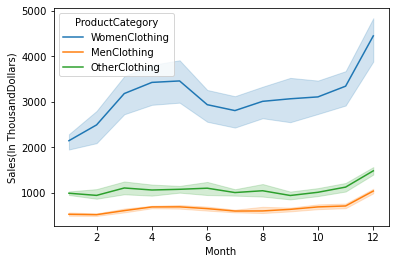

In [468]:
sns.lineplot(x=sales['Month'], y=sales['Sales(In ThousandDollars)'],hue=sales['ProductCategory'])

<AxesSubplot:xlabel='Year-Month', ylabel='Earnings or wages  in dollars per hour'>

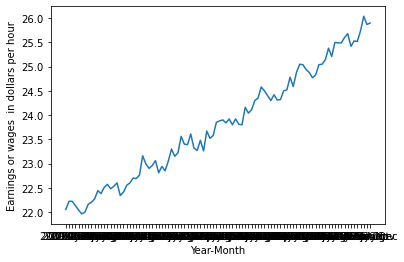

In [11]:
sns.lineplot(x=macro_economic['Year-Month'], y=macro_economic['Earnings or wages  in dollars per hour'])

<AxesSubplot:xlabel='Year-Month', ylabel='unemployment rate'>

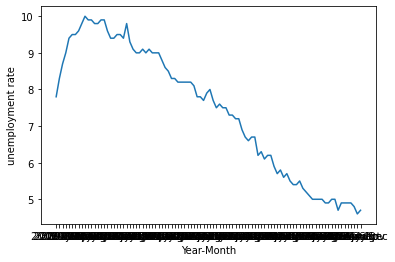

In [12]:
sns.lineplot(x=macro_economic['Year-Month'], y=macro_economic['unemployment rate'])

<AxesSubplot:xlabel='Month', ylabel='Temp avg (°C)'>

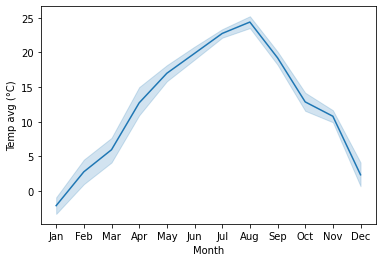

In [13]:
sns.lineplot(x=weather09['Month'], y=weather09['Temp avg (°C)'])

# Data Preparation of Macro_economic data

In [470]:
macro_economic.insert(loc=0,column='Year',value=macro_economic['Year-Month'].str.split(expand=True)[0].astype('int64'))
macro_economic.insert(loc=1,column='Month',value=macro_economic['Year-Month'].str.split(expand=True)[2])

In [471]:
macro_economic.drop('Year-Month',axis=1,inplace=True)
macro_economic.drop('PartyInPower',axis=1,inplace=True)
macro_economic.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1, inplace=True)
macro_economic['Month'].unique()
macro_economic['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12},inplace=True)

In [472]:
# 5 years
economic09_13 = macro_economic[macro_economic['Year'].between(2009,2013)]
print(economic09_13.head(2)['Year'])
print(economic09_13.tail(2)['Year'])


# 1 year 2014 (Output)
economic14 = macro_economic[macro_economic['Year']==2014]

0    2009
1    2009
Name: Year, dtype: int64
58    2013
59    2013
Name: Year, dtype: int64


# Data Preparation for weather patterns dataset

In [473]:
weather09['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
temp = weather09.groupby(['Year','Month']).median().reset_index()
we09 = pd.merge(left=temp,right=weather09.groupby(['Month']).count()['WeatherEvent'].reset_index(), how='inner',on='Month')

In [474]:
for i in weather12.columns:
    weather12.loc[:,i].replace({'-':-1},inplace=True)
for i in weather13.columns:
    weather13.loc[:,i].replace({'-':-1},inplace=True)
for i in weather14.columns:
    weather14.loc[:,i].replace({'-':-1},inplace=True)
for i in weather14.columns:
    weather14.loc[:,i].replace({'-':-1},inplace=True)

In [475]:
weather09.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather09.iloc[:,-2].fillna(weather09.iloc[:,-2].mean(),inplace=True)

weather10.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather10.iloc[:,-2].fillna(weather10.iloc[:,-2].mean(),inplace=True)

weather11.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather11.iloc[:,-2].fillna(weather11.iloc[:,-2].mean(),inplace=True)

weather12.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather12.iloc[:,-2].fillna(weather12.iloc[:,-2].mean(),inplace=True)

weather13.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather13.iloc[:,-2].fillna(weather13.iloc[:,-2].mean(),inplace=True)

weather14.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather14.iloc[:,-2].fillna(weather14.iloc[:,-2].mean(),inplace=True)

In [476]:
weather14['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)

In [477]:
yt= 2010
for number in range(10,15):
    vars()['weather'+str(number)]['Year'] = yt
    yt += 1
    vars()['weather'+str(number)]['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
    temp = vars()['weather'+str(number)].groupby(['Year','Month']).median().reset_index()
    vars()['we'+str(number)] = pd.merge(left=temp,right=vars()['weather'+str(number)].groupby(['Month']).count()['WeatherEvent'].reset_index(), how='inner',on='Month')

In [478]:
we09.shape,we10.shape,we11.shape,we12.shape,we13.shape

((12, 19), (12, 22), (12, 22), (12, 23), (12, 23))

In [479]:
we14.iloc[:,[0,1,2,4,7,10,16,-1]].columns
#Using these columns only

Index(['Year', 'Month', 'Day', 'Temp avg (°C)', 'Dew Point avg (°C)',
       'Humidity (%) avg', 'Visibility (km) avg', 'WeatherEvent'],
      dtype='object')

In [480]:
for i in range(10,14):
    vars()['w'+str(i)] = vars()['we'+str(i)].iloc[:,[0,1,2,4,7,10,16,-1]]

In [481]:
w09 = we09.iloc[:,[0,1,2,4,7,10,16,-1]]

In [482]:
weather5yrs = w09.append([w10,w11,w12,w13],ignore_index=True)
weather5yrs.head()

,Year,Month,Day,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent
0,2009,1,16.0,-2.0,-10.0,54.0,16.0,10
1,2009,2,14.5,3.0,-6.5,50.0,16.0,6
2,2009,3,16.0,7.0,-1.0,56.0,16.0,10
3,2009,4,15.5,11.5,2.5,54.5,16.0,12
4,2009,5,16.0,17.0,11.0,69.0,15.0,14


<AxesSubplot:xlabel='Month', ylabel='WeatherEvent'>

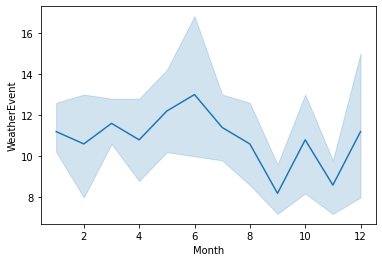

In [28]:
sns.lineplot(x=weather5yrs['Month'],y=weather5yrs['WeatherEvent'])

In [483]:
weather1yr = we14.iloc[:,[0,1,2,4,7,10,16,-1]]
weather1yr.shape

(12, 8)

In [484]:
weather5yrs.drop('Day',axis=1,inplace=True)
weather1yr.drop('Day',axis=1,inplace=True)

# Data Preparation of holidays data

In [485]:
holidays['Month'] = holidays['MonthDate'].dt.month
holidays

,Year,MonthDate,Event,DayCategory,Month
0,2009,2001-01-01,New Year's Day,Federal Holiday,1
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday,1
2,2009,2014-02-01,Valentine's Day,Event,2
3,2009,2016-02-01,Presidents' Day,Federal Holiday,2
4,2009,2012-04-01,Easter Sunday,Event,4
...,...,...,...,...,...
145,2016,2024-11-01,Thanksgiving Day,Federal Holiday,11
146,2016,2024-12-01,Christmas Eve,Event,12
147,2016,2025-12-01,Christmas Day,Federal Holiday,12
148,2016,2026-12-01,'Christmas Day' observed,Federal Holiday,12


In [486]:
holidays['DayCategory'].unique()

array(['Federal Holiday', 'Event'], dtype=object)

In [487]:
holidays['Event'].unique()

array(["New Year's Day", 'Martin Luther King Jr. Day', "Valentine's Day",
       "Presidents' Day", 'Easter Sunday', "Mother's Day", 'Memorial Day',
       "Father's Day", "'Independence Day' observed", 'Independence Day',
       'Labor Day', 'Columbus Day (Most regions)', 'Halloween',
       'Veterans Day', 'Thanksgiving Day', 'Christmas Eve',
       'Christmas Day', "New Year's Eve", "'Christmas Day' observed",
       "'New Year's Day' observed", 'Election Day',
       "Thomas Jefferson's Birthday", 'Day After Christmas Day'],
      dtype=object)

In [488]:
temp = holidays.groupby(['Year','Month']).count()['Event'].reset_index()
temp914 = temp[temp['Year'].between(2009,2014)]
temp914

,Year,Month,Event
0,2009,1,2
1,2009,2,2
2,2009,4,1
3,2009,5,2
4,2009,6,1
5,2009,7,2
6,2009,9,1
7,2009,10,2
8,2009,11,2
9,2009,12,3


In [489]:
#Encoding missing Months holidays
for i in range(2009,2015):
    temp914=temp914.append(other={'Year':i, 'Month':3,'Event': 0},ignore_index=True)
    temp914=temp914.append(other={'Year':i, 'Month':8,'Event': 0},ignore_index=True)
temp914.sort_values(by=['Year','Month'],ignore_index=True,inplace=True)
len(temp914)

72

In [490]:
holiday9_13 = temp914[temp914['Year'].between(2009,2013)]
holiday14 = temp914[temp914['Year']==2014]

# Merging of DATAFRAMES

In [491]:
#Matching Granularity
sales.shape

(180, 4)

In [492]:
sales.head(2)

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0


In [493]:
train = pd.read_csv("submission.csv")
train.head()

,Year,Month,ProductCategory,Unnamed: 3,Sales(In ThousandDollars)
0,2014,1,WomenClothing,NaN,NaN
1,2014,1,MenClothing,NaN,NaN
2,2014,1,OtherClothing,NaN,NaN
3,2014,2,WomenClothing,NaN,NaN
4,2014,2,MenClothing,NaN,NaN


In [494]:
test = train.drop(['Unnamed: 3','Sales(In ThousandDollars)'],axis=1)
test.head()

,Year,Month,ProductCategory
0,2014,1,WomenClothing
1,2014,1,MenClothing
2,2014,1,OtherClothing
3,2014,2,WomenClothing
4,2014,2,MenClothing


In [495]:
holiday14.shape,weather1yr.shape,economic14.shape

((12, 3), (12, 7), (12, 17))

In [496]:
#YEAR 14

#holidays and sales
merge14_1 = pd.merge(left=test,right=holiday14,how='inner',left_on=['Year','Month'],right_on=['Year','Month'])

#holiday,sales and Weather
merge14_2 = pd.merge(left=merge14_1, right=weather1yr, how='inner')

#holiday,sales, Weather and macroeconomic
merge14_3 = pd.merge(left=merge14_2, right=economic14, how='inner')

In [497]:
sales_data_14 = merge14_3.copy()

In [498]:
sales_data_14['Year'].replace({2014:6},inplace=True)

In [499]:
holiday9_13.shape,weather5yrs.shape,economic09_13.shape,sales.shape,holiday9_13.shape

((60, 3), (60, 7), (60, 17), (180, 4), (60, 3))

In [500]:
#YEAR 09 - 13


#holidays and sales
merge1 = pd.merge(left=sales,right=holiday9_13,how='inner',left_on=['Year','Month'],right_on=['Year','Month'])

#holiday,sales and Weather
merge2 = pd.merge(left=merge1, right=weather5yrs, how='inner')

#holiday,sales, Weather and macroeconomic
merge3 = pd.merge(left=merge2, right=economic09_13, how='inner')

In [501]:
sales_data_09_13 = merge3.copy()
sales_data_09_13

,Year,Month,ProductCategory,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009,1,WomenClothing,1755.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
1,2009,1,MenClothing,524.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
2,2009,1,OtherClothing,936.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
3,2009,2,WomenClothing,1729.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,2009,2,MenClothing,496.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2013,11,MenClothing,798.0,2,7.0,-3.0,52.0,16.0,10,17053.738107,15841.758762,257.377,6.9,11.85,10.22,24.11,84.65,-5.26,10.136,7.582,790,12.479,3.58,9.65
176,2013,11,OtherClothing,1209.0,2,7.0,-3.0,52.0,16.0,10,17053.738107,15841.758762,257.377,6.9,11.85,10.22,24.11,84.65,-5.26,10.136,7.582,790,12.479,3.58,9.65
177,2013,12,WomenClothing,4865.0,3,2.0,-4.0,64.0,16.0,11,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,87.49,3.35,10.136,7.582,788,12.443,3.58,9.65
178,2013,12,MenClothing,1085.0,3,2.0,-4.0,64.0,16.0,11,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,87.49,3.35,10.136,7.582,788,12.443,3.58,9.65


In [53]:
#Dropping nan Values---Nan in sales (Output feature itself)
sales_data_09_13.dropna(inplace=True)
sales_data_09_13['Year'].replace({2009:1,2010:2,2011:3, 2012:4, 2013:5},inplace=True)

In [54]:
sales_data_09_13

,Year,Month,ProductCategory,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,1,1,WomenClothing,1755.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
1,1,1,MenClothing,524.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
2,1,1,OtherClothing,936.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
3,1,2,WomenClothing,1729.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,1,2,MenClothing,496.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5,11,MenClothing,798.0,2,7.0,-3.0,52.0,16.0,10,17053.738107,15841.758762,257.377,6.9,11.85,10.22,24.11,84.65,-5.26,10.136,7.582,790,12.479,3.58,9.65
176,5,11,OtherClothing,1209.0,2,7.0,-3.0,52.0,16.0,10,17053.738107,15841.758762,257.377,6.9,11.85,10.22,24.11,84.65,-5.26,10.136,7.582,790,12.479,3.58,9.65
177,5,12,WomenClothing,4865.0,3,2.0,-4.0,64.0,16.0,11,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,87.49,3.35,10.136,7.582,788,12.443,3.58,9.65
178,5,12,MenClothing,1085.0,3,2.0,-4.0,64.0,16.0,11,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,87.49,3.35,10.136,7.582,788,12.443,3.58,9.65


In [59]:
sales913 = pd.get_dummies(data=sales_data_09_13,columns=['ProductCategory'])
sales14 = pd.get_dummies(data=sales_data_14,columns=['ProductCategory'])

In [60]:
X = sales913.drop('Sales(In ThousandDollars)',axis=1)
y = sales913['Sales(In ThousandDollars)']

In [65]:
#All data without scaling and Transformations
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [66]:
#OLS Model
xtrain_c = sm.add_constant(xtrain)
mlr_model = sm.OLS(ytrain,xtrain_c).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Sales(In ThousandDollars)   R-squared:                       0.941
Model:                                   OLS   Adj. R-squared:                  0.927
Method:                        Least Squares   F-statistic:                     70.05
Date:                       Sat, 02 Oct 2021   Prob (F-statistic):           3.52e-56
Time:                               13:42:22   Log-Likelihood:                -958.32
No. Observations:                        136   AIC:                             1969.
Df Residuals:                            110   BIC:                             2044.
Df Model:                                 25                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                             -2.333e+04   1.77e+04     -1.319      0.190   -5.84e+04    1.17e+04
Year                                                                235.9588    470.149      0.502      0.617    -695.767    1167.685
Month                                                                94.9706     42.159      2.253      0.026      11.421     178.521
Event                                                                -4.8984     48.225     -0.102      0.919    -100.468      90.672
Temp avg (°C)                                                        -5.3183     41.559     -0.128      0.898     -87.678      77.041
Dew Point avg (°C)                                                  -17.2682     42.975     -0.402      0.689    -102.435      67.899
Humidity (%) avg                                                      0.3643     14.485      0.025      0.980     -28.341      29.070
Visibility (km) avg                                                 -73.4282     59.094     -1.243      0.217    -190.539      43.682
WeatherEvent                                                          0.6014     19.012      0.032      0.975     -37.076      38.279
Monthly Nominal GDP Index (inMillion$)                               -2.5905      2.079     -1.246      0.215      -6.710       1.529
Monthly Real GDP Index (inMillion$)                                   2.9346      2.312      1.269      0.207      -1.647       7.517
CPI                                                                 110.4792     67.393      1.639      0.104     -23.078     244.036
unemployment rate                                                  -594.4414    221.920     -2.679      0.009   -1034.236    -154.647
CommercialBankInterestRateonCreditCardPlans                         397.5588    183.253      2.169      0.032      34.395     760.723
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan   318.4225    197.853      1.609      0.110     -73.675     710.520
Earnings or wages  in dollars per hour                             -329.5851    334.534     -0.985      0.327    -992.553     333.382
Cotton Monthly Price - US cents per Pound(lbs)                       -2.1064      2.110     -0.998      0.320      -6.289       2.076
Change(in%)                                                           0.8601      5.582      0.154      0.878     -10.202      11.923
Average upland planted(million acres)                                53.8151     39.646      1.357      0.177     -24.754     132.384
Average upland harvested(million acres)                   

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)

lr = LinearRegression()
lr.fit(xtrain,ytrain)

kf = KFold(n_splits=7)
score_cv = cross_val_score(estimator=lr,X=xtrain,y=ytrain,scoring='neg_mean_squared_error',cv=kf)
avg_rmse_train = np.mean(np.sqrt(abs(score_cv)))
print("Average Train RMSE : ",avg_rmse_train)

#Train
ypred_train = lr.predict(xtrain)
RMSE_train = mean_squared_error(ytrain,ypred_train,squared=False)
MAPE_train = mean_absolute_percentage_error(ytrain,ypred_train)
r2_train = r2_score(ytrain,ypred_train)

#Test
ypred_test = lr.predict(xtest)
RMSE_test = mean_squared_error(ytest,ypred_test,squared=False)
MAPE_test = mean_absolute_percentage_error(ytest,ypred_test)
r2_test = r2_score(ytest,ypred_test)


print("Train")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_train,MAPE_train,r2_train))
print("="*75)
print("Test")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_test,MAPE_test,r2_test))

Average Train RMSE :  412.4473143893678
Train
RMSE = 299.6589102499914  | MAPE = 0.16730829645920983  |   R2 Score = 0.9360128557554596
Test
RMSE = 331.58842730739093  | MAPE = 0.23169653480061222  |   R2 Score = 0.8938225875307344


In [82]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)
rid = Ridge(alpha=0.5)
rid.fit(xtrain,ytrain)

kf = KFold(n_splits=7)
score_cv = cross_val_score(estimator=rid,X=xtrain,y=ytrain,scoring='neg_mean_squared_error',cv=kf)
avg_rmse_train = np.mean(np.sqrt(abs(score_cv)))
print("Average Train RMSE : ",avg_rmse_train)

#Train
ypred_train = rid.predict(xtrain)
RMSE_train = mean_squared_error(ytrain,ypred_train,squared=False)
MAPE_train = mean_absolute_percentage_error(ytrain,ypred_train)
r2_train = r2_score(ytrain,ypred_train)

#Test
ypred_test = rid.predict(xtest)
RMSE_test = mean_squared_error(ytest,ypred_test,squared=False)
MAPE_test = mean_absolute_percentage_error(ytest,ypred_test)
r2_test = r2_score(ytest,ypred_test)


print("Train")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_train,MAPE_train,r2_train))
print("="*75)
print("Test")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_test,MAPE_test,r2_test))

Average Train RMSE :  379.7332417738154
Train
RMSE = 316.68222137611906  | MAPE = 0.17745820989645966  |   R2 Score = 0.9272853397671263
Test
RMSE = 291.64490971874096  | MAPE = 0.22425071625498305  |   R2 Score = 0.9276591732602867


In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=208)

rf = RandomForestRegressor(max_depth=7,n_estimators=151)
rf.fit(xtrain,ytrain)

kf = KFold(n_splits=7)
score_cv = cross_val_score(estimator=rf,X=xtrain,y=ytrain,scoring='neg_mean_squared_error',cv=kf)
avg_rmse_train = np.mean(np.sqrt(abs(score_cv)))
print("Average Train RMSE : ",avg_rmse_train)

#Train
ypred_train = rf.predict(xtrain)
RMSE_train = mean_squared_error(ytrain,ypred_train,squared=False)
MAPE_train = mean_absolute_percentage_error(ytrain,ypred_train)
r2_train = r2_score(ytrain,ypred_train)

#Test
ypred_test = rf.predict(xtest)
RMSE_test = mean_squared_error(ytest,ypred_test,squared=False)
MAPE_test = mean_absolute_percentage_error(ytest,ypred_test)
r2_test = r2_score(ytest,ypred_test)


print("Train")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_train,MAPE_train,r2_train))
print("="*75)
print("Test")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_test,MAPE_test,r2_test))

Average Train RMSE :  244.04181006022753
Train
RMSE = 96.62351011634  | MAPE = 0.032578625928947454  |   R2 Score = 0.9938644774039194
Test
RMSE = 211.0765096839111  | MAPE = 0.08845518831314238  |   R2 Score = 0.9203109691419299


In [98]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=208)

ada = AdaBoostRegressor(base_estimator=rf,learning_rate=0.7)
ada.fit(xtrain,ytrain)

kf = KFold(n_splits=7)
#score_cv = cross_val_score(estimator=ada,X=xtrain,y=ytrain,scoring='neg_mean_squared_error',cv=kf)
#avg_rmse_train = np.mean(np.sqrt(abs(score_cv)))
#print("Average Train RMSE : ",avg_rmse_train)

#Train
ypred_train = ada.predict(xtrain)
RMSE_train = mean_squared_error(ytrain,ypred_train,squared=False)
MAPE_train = mean_absolute_percentage_error(ytrain,ypred_train)
r2_train = r2_score(ytrain,ypred_train)

#Test
ypred_test = ada.predict(xtest)
RMSE_test = mean_squared_error(ytest,ypred_test,squared=False)
MAPE_test = mean_absolute_percentage_error(ytest,ypred_test)
r2_test = r2_score(ytest,ypred_test)


print("Train")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_train,MAPE_train,r2_train))
print("="*75)
print("Test")
print("RMSE = {}  | MAPE = {}  |   R2 Score = {}".format(RMSE_test,MAPE_test,r2_test))

Train
RMSE = 46.672716078774194  | MAPE = 0.03684016885919987  |   R2 Score = 0.9985684316468096
Test
RMSE = 249.58269973788887  | MAPE = 0.08984484878590625  |   R2 Score = 0.8885839664970965


# Time-Series Model building

In [129]:
#There were null data points in the dataset wherin Sales column had null values.
#We cannot drop these values as timestamp would be lost
sales_data_09_13_withNUll = merge3.copy()

In [504]:
#Building Separate models for Men , women and Other product Category
sales913_men = sales_data_09_13_withNUll[sales_data_09_13_withNUll['ProductCategory']=='MenClothing']
sales913_Women = sales_data_09_13_withNUll[sales_data_09_13_withNUll['ProductCategory']=='WomenClothing']
sales913_other = sales_data_09_13_withNUll[sales_data_09_13_withNUll['ProductCategory']=='OtherClothing']

sales14_men = sales_data_14[sales_data_14['ProductCategory']=='MenClothing']
sales14_Women = sales_data_14[sales_data_14['ProductCategory']=='WomenClothing']
sales14_other = sales_data_14[sales_data_14['ProductCategory']=='OtherClothing']

In [131]:
TimeStamp = pd.date_range(start='2009-01-01',freq='M',periods=len(sales913_men))
sales913_men['TimeStamp'] = TimeStamp
sales913_men.set_index(keys='TimeStamp',inplace=True)
sales913_men

,Year,Month,ProductCategory,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-31,2009,1,MenClothing,524.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
2009-02-28,2009,2,MenClothing,496.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
2009-03-31,2009,3,MenClothing,542.0,0,7.0,-1.0,56.0,16.0,10,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
2009-04-30,2009,4,MenClothing,669.0,1,11.5,2.5,54.5,16.0,12,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225
2009-05-31,2009,5,MenClothing,650.0,2,17.0,11.0,69.0,15.0,14,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300
2009-06-30,2009,6,MenClothing,607.0,1,20.0,16.0,80.0,12.0,20,14348.530666,14346.820106,237.172,9.5,13.32,11.25,21.96,61.39,-0.90,8.668,7.760,796,12.876,3.470,10.300
2009-07-31,2009,7,MenClothing,575.0,2,23.0,18.0,72.0,15.0,13,14317.372922,14345.676097,237.600,9.5,13.32,11.25,22.00,64.80,5.55,8.905,7.753,796,12.863,3.470,9.700
2009-08-31,2009,8,MenClothing,551.0,0,24.0,19.0,71.0,16.0,13,14424.284901,14435.812509,238.282,9.6,13.71,10.89,22.16,64.26,-0.83,8.905,7.619,809,12.840,3.470,9.700
2009-09-30,2009,9,MenClothing,579.0,1,19.0,13.0,68.0,16.0,7,14410.777177,14425.972752,238.568,9.8,13.71,10.89,22.20,64.07,-0.30,8.989,7.582,827,13.071,3.470,10.000


In [135]:
#Interpolating Missing Values -- Method = spline order=2

sales913_men.interpolate(method='spline',order=2,inplace=True)
sales913_Women.interpolate(method='spline',order=2,inplace=True)
sales913_other.interpolate(method='spline',order=2,inplace=True)

In [156]:
#Women
TimeStamp = pd.date_range(start='2009-01-01',freq='M',periods=len(sales913_Women))
sales913_Women['TimeStamp'] = TimeStamp
sales913_Women.set_index(keys='TimeStamp',inplace=True)

#Others
TimeStamp = pd.date_range(start='2009-01-01',freq='M',periods=len(sales913_other))
sales913_other['TimeStamp'] = TimeStamp
sales913_other.set_index(keys='TimeStamp',inplace=True)

# TSA - Decomposition

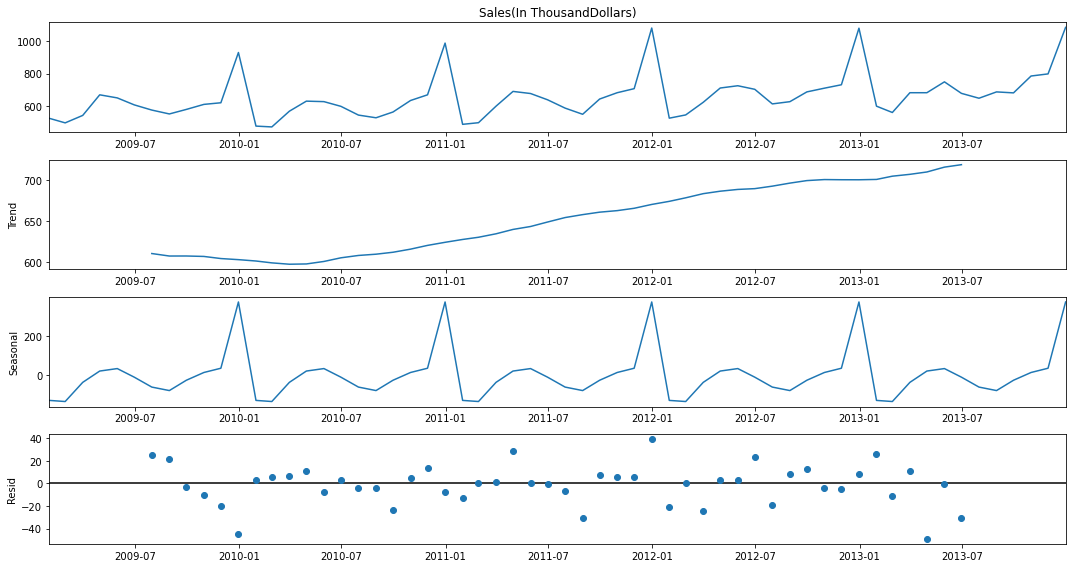

In [152]:
#Men
rcParams['figure.figsize']=15,8
decompose_add = seasonal_decompose(sales913_men['Sales(In ThousandDollars)'],model='additive')
decompose_add.plot();

<AxesSubplot:xlabel='TimeStamp'>

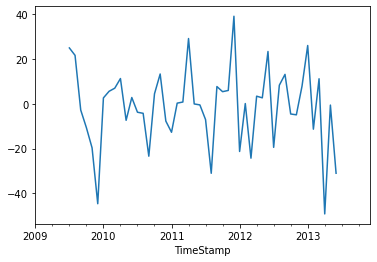

In [146]:
decompose_add.resid.plot() #Some pattern of seasonality can be seen

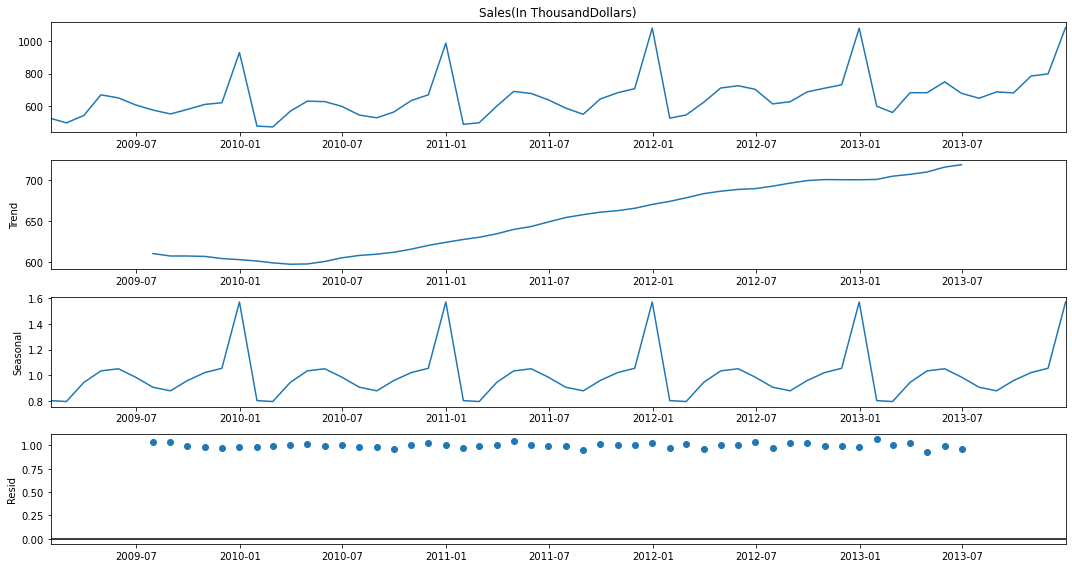

In [153]:
#Men
decompose_mul = seasonal_decompose(sales913_men['Sales(In ThousandDollars)'],model='multiplicative')
decompose_mul.plot();

<AxesSubplot:xlabel='TimeStamp'>

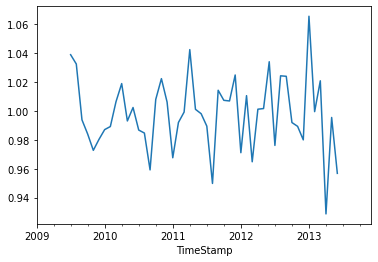

In [148]:
decompose_mul.resid.plot()

In [149]:
# Inferences the above is a multiplicative Model

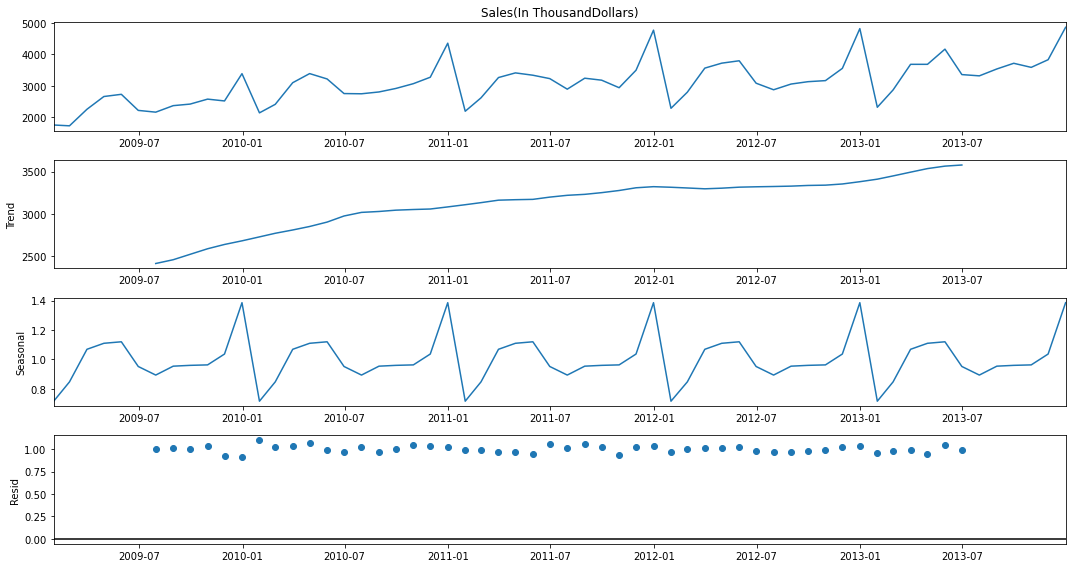

In [157]:
#Women
decompose_mul = seasonal_decompose(x=sales913_Women['Sales(In ThousandDollars)'],model='multiplicative')
decompose_mul.plot();

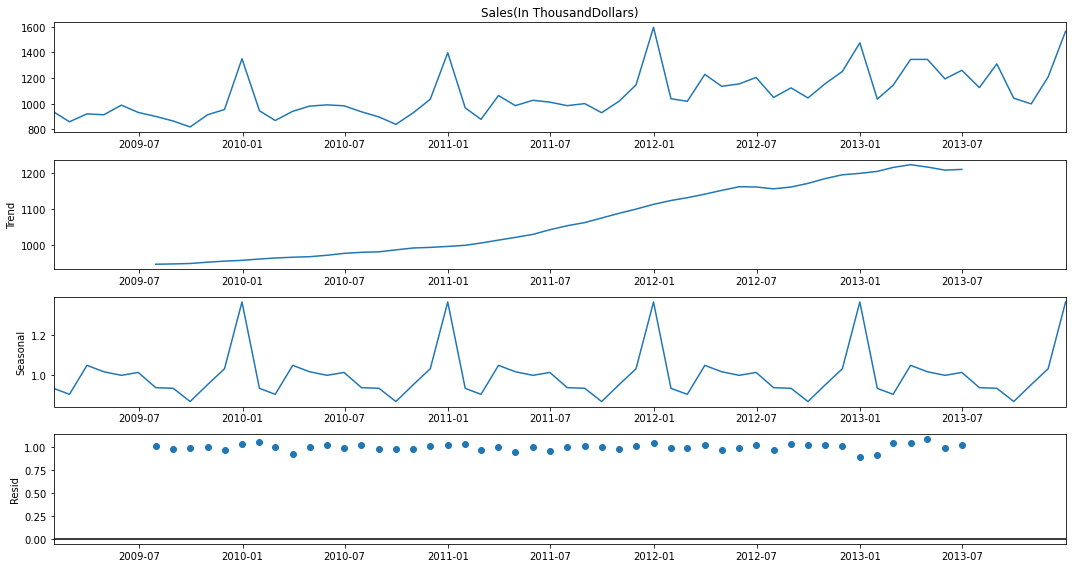

In [158]:
#Others
decompose_mul = seasonal_decompose(x=sales913_other['Sales(In ThousandDollars)'],model='multiplicative')
decompose_mul.plot();

# Time Series Model Building

# Simple Bivariate Time Series models (Using only Sales)

In [168]:
#Men
train_men = sales913_men.iloc[:int(len(sales913_men)*0.7)]
test_men = sales913_men.iloc[int(len(sales913_men)*0.7):]

#Women
train_women = sales913_Women.iloc[:int(len(sales913_Women)*0.7)]
test_women = sales913_Women.iloc[int(len(sales913_Women)*0.7):]

#Others
train_other = sales913_other.iloc[:int(len(sales913_other)*0.7)]
test_other = sales913_other.iloc[int(len(sales913_other)*0.7):]

print(train_men.shape, test_men.shape)

(42, 25) (18, 25)


<AxesSubplot:xlabel='TimeStamp'>

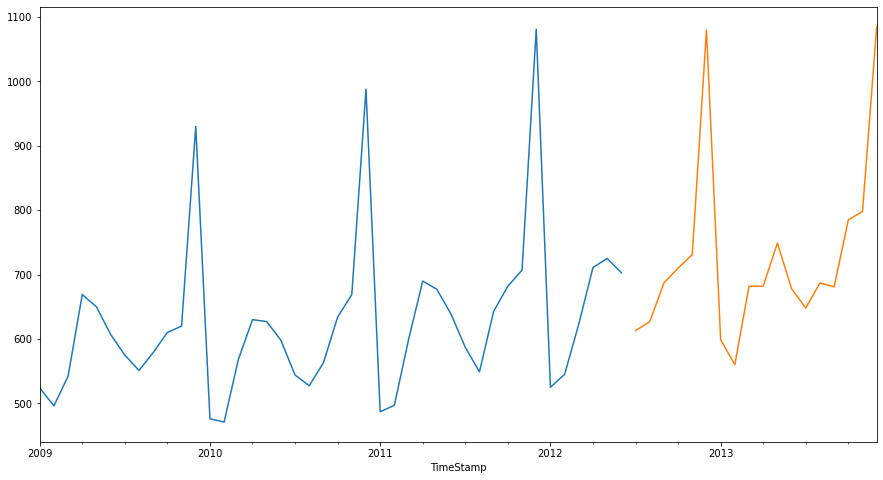

In [171]:
train_men['Sales(In ThousandDollars)'].plot()
test_men['Sales(In ThousandDollars)'].plot()

## Linear regression

In [178]:
#MEN
linear_trainXmen = np.arange(1,len(train_men)+1).reshape(-1,1)
linear_testXmen = np.arange(len(train_men),len(sales913_men)).reshape(-1,1)

#From Our target values
linear_trainYmen = train_men['Sales(In ThousandDollars)'].values
linear_testYmen = test_men['Sales(In ThousandDollars)'].values

lr = LinearRegression()
lr.fit(linear_trainXmen,linear_trainYmen)

test_predict = lr.predict(linear_testXmen)
linear_rmse_men = mean_squared_error(linear_testYmen,test_predict,squared=False)
print("For Linear Regression MEN Test Data RMSE is %.4f"%(linear_rmse_men))

#############################################
#WOmen
linear_trainXwomen = np.arange(1,len(train_women)+1).reshape(-1,1)
linear_testXwomen = np.arange(len(train_women),len(sales913_Women)).reshape(-1,1)

#From Our target values
linear_trainYwomen = train_women['Sales(In ThousandDollars)'].values
linear_testYwomen = test_women['Sales(In ThousandDollars)'].values

lr = LinearRegression()
lr.fit(linear_trainXwomen,linear_trainYwomen)

test_predict = lr.predict(linear_testXwomen)
linear_rmse_women = mean_squared_error(linear_testYwomen,test_predict,squared=False)
print("For Linear Regression WOMEN Test Data RMSE is %.4f"%(linear_rmse_women))

##############################################
#Others
linear_trainXothers = np.arange(1,len(train_other)+1).reshape(-1,1)
linear_testXothers = np.arange(len(train_other),len(sales913_other)).reshape(-1,1)

#From Our target values
linear_trainYothers = train_other['Sales(In ThousandDollars)'].values
linear_testYothers = test_other['Sales(In ThousandDollars)'].values

lr = LinearRegression()
lr.fit(linear_trainXothers,linear_trainYothers)

test_predict = lr.predict(linear_testXothers)
linear_rmse_others = mean_squared_error(linear_testYothers,test_predict,squared=False)
print("For Linear Regression Others Test Data RMSE is %.4f"%(linear_rmse_others))

For Linear Regression MEN Test Data RMSE is 134.8997
For Linear Regression WOMEN Test Data RMSE is 651.8670
For Linear Regression Others Test Data RMSE is 148.6086


In [179]:
result_df = pd.DataFrame({'TestRMSE_MEN':linear_rmse_men,'TestRMSE_WOMEN':linear_rmse_women,'TestRMSE_OTHERS':linear_rmse_others},index=['Linear Regression'])
result_df

,TestRMSE_MEN,TestRMSE_WOMEN,TestRMSE_OTHERS
Linear Regression,134.899731,651.867033,148.608605


# Simple Exponential Smoothing -only Level 

In [183]:
#MEN
simple_men =  SimpleExpSmoothing(train_men['Sales(In ThousandDollars)'],initialization_method='estimated')
simple_model_men = simple_men.fit(optimized=True,use_brute=True)

simple_predict_men = simple_model_men.forecast(steps=len(test_men))
SES_rmse_men = mean_squared_error(linear_testYmen,simple_predict_men,squared=False)
print("For Simple exponential smoothing (Level Smoothing) rmse is %.4f"%(SES_rmse_men))

###################################################
#Women
simple_women =  SimpleExpSmoothing(train_women['Sales(In ThousandDollars)'],initialization_method='estimated')
simple_model_women = simple_women.fit(optimized=True,use_brute=True)

simple_predict_women = simple_model_women.forecast(steps=len(test_women))
SES_rmse_women = mean_squared_error(linear_testYwomen,simple_predict_women,squared=False)
print("For Simple exponential smoothing (Level Smoothing) rmse is %.4f"%(SES_rmse_women))

###################################################
#Others
simple_other =  SimpleExpSmoothing(train_other['Sales(In ThousandDollars)'],initialization_method='estimated')
simple_model_other = simple_other.fit(optimized=True,use_brute=True)

simple_predict_other = simple_model_other.forecast(steps=len(test_other))
SES_rmse_other = mean_squared_error(linear_testYothers,simple_predict_other,squared=False)
print("For Simple exponential smoothing (Level Smoothing) rmse is %.4f"%(SES_rmse_other))

For Simple exponential smoothing (Level Smoothing) rmse is 153.7835
For Simple exponential smoothing (Level Smoothing) rmse is 640.6841
For Simple exponential smoothing (Level Smoothing) rmse is 170.3810


In [184]:
test_sesdf = pd.DataFrame({'TestRMSE_MEN':SES_rmse_men,'TestRMSE_WOMEN':SES_rmse_women,'TestRMSE_OTHERS':SES_rmse_other},index=['Simple Exponential Smoothing'])
result_df = pd.concat([result_df,test_sesdf])
result_df

,TestRMSE_MEN,TestRMSE_WOMEN,TestRMSE_OTHERS
Linear Regression,134.899731,651.867033,148.608605
Simple Exponential Smoothing,153.783498,640.684050,170.380985


## Holt-Winter -- Level+trend+Seasonality

In [195]:
#Men
holt_winter_men = ExponentialSmoothing(train_men['Sales(In ThousandDollars)'],seasonal='multiplicative',trend='additive')
hw_model_men = holt_winter_men.fit(optimized=True,use_brute=True)
hw_predict_men = hw_model_men.forecast(steps=len(test_men))
hw_rmse_men = mean_squared_error(linear_testYmen, hw_predict_men, squared=False)
print("For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_men))

##########################################################
#Women
holt_winter_women = ExponentialSmoothing(train_women['Sales(In ThousandDollars)'],seasonal='multiplicative',trend='additive')
hw_model_women = holt_winter_women.fit(optimized=True,use_brute=True)
hw_predict_women = hw_model_women.forecast(steps=len(test_women))
hw_rmse_women = mean_squared_error(linear_testYwomen, hw_predict_women, squared=False)
print("For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_women))

##########################################################
#Others
holt_winter_other = ExponentialSmoothing(train_other['Sales(In ThousandDollars)'],seasonal='additive',trend='additive')
hw_model_other = holt_winter_other.fit(optimized=True,use_brute=True)
hw_predict_other = hw_model_other.forecast(steps=len(test_other))
hw_rmse_other = mean_squared_error(linear_testYothers, hw_predict_other, squared=False)
print("For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_other))

For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is 51.0663
For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is 160.5569
For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is 184.1675


In [196]:
test_holtdf = pd.DataFrame({'TestRMSE_MEN':hw_rmse_men,'TestRMSE_WOMEN':hw_rmse_women,'TestRMSE_OTHERS':hw_rmse_other},index=['Holt-Winters'])
result_df = pd.concat([result_df,test_holtdf])
result_df

,TestRMSE_MEN,TestRMSE_WOMEN,TestRMSE_OTHERS
Linear Regression,134.899731,651.867033,148.608605
Simple Exponential Smoothing,153.783498,640.684050,170.380985
Holt-Winters,51.066332,160.556911,184.167472


In [505]:
sales913_men.to_csv("Sales913_men.csv",index=False)
sales913_Women.to_csv("sales913_Women.csv",index=False)
sales913_other.to_csv("sales913_other.csv",index=False)

sales14_men.to_csv("sales14_men.csv",index=False)
sales14_Women.to_csv("sales14_Women.csv",index=False)
sales14_other.to_csv("sales14_other.csv",index=False)



In [200]:
#Above Exponential Models can be tunned further by doing hyperparameter tunning  of alpha , beta and gamma components\

# SARIMAX

## Stationarity check

In [275]:
print("Null Hypothesis : The Data is non-stationary")
print("Alternate Hypothesis : The Data is stationary")
#Level of significance considered = 5%
print("="*75)

#Men
adf = adfuller(train_men['Sales(In ThousandDollars)'])
#print(adf)
print('P-value MEN CLOTHING: ',adf[1])
print('As pvalue is less than 5% we reject null hypothesis. The data is stationary for Men Clothing')
# the Timeseries is stationary for men clothing
print("="*75)
#################################################
#Women
adf = adfuller(train_women['Sales(In ThousandDollars)'])
#print(adf)
print('P-value WOMEN CLOTHING: ',adf[1])
print('As pvalue is more than 5% we Fail to reject null hypothesis. The data is NOT stationary for Women Clothing')
# the Timeseries is not stationary for women clothing
print("="*75)

#################################################
#Other
adf = adfuller(train_other['Sales(In ThousandDollars)'])
#print(adf)
print('P-value Other CLOTHING: ',adf[1])
print('As pvalue is less than 5% we reject null hypothesis. The data is stationary')
# the Timeseries is stationary for other clothing


#Only Women Clothing Requires Differencing 

Null Hypothesis : The Data is non-stationary
Alternate Hypothesis : The Data is stationary
P-value MEN CLOTHING:  3.215814308300333e-07
As pvalue is less than 5% we reject null hypothesis. The data is stationary for Men Clothing
P-value WOMEN CLOTHING:  0.34097803398330084
As pvalue is more than 5% we Fail to reject null hypothesis. The data is NOT stationary for Women Clothing
P-value Other CLOTHING:  0.0002491657649314024
As pvalue is less than 5% we reject null hypothesis. The data is stationary


<AxesSubplot:xlabel='TimeStamp'>

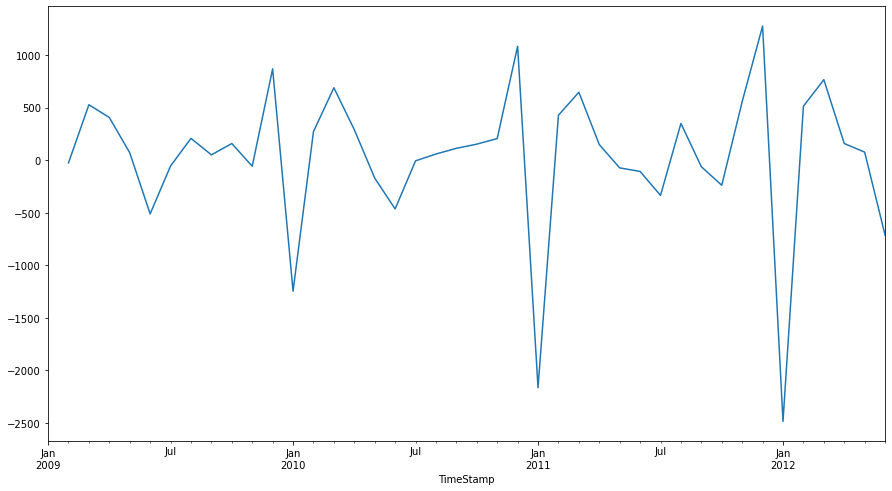

In [215]:
train_women['Sales(In ThousandDollars)'].diff(1).plot()

In [234]:
#Women ---1st order Differencing
adf = adfuller(train_women['Sales(In ThousandDollars)'].diff(periods=1).dropna())
#print(adf)
print('P-value WOMEN CLOTHING: ',adf[1])
print('As pvalue is less than 5% we reject null hypothesis. The data is stationary for Women Clothing')

# the Timeseries is stationary for women clothing


P-value WOMEN CLOTHING:  0.03152076617152689
As pvalue is less than 5% we reject null hypothesis. The data is stationary for Women Clothing


<AxesSubplot:xlabel='TimeStamp'>

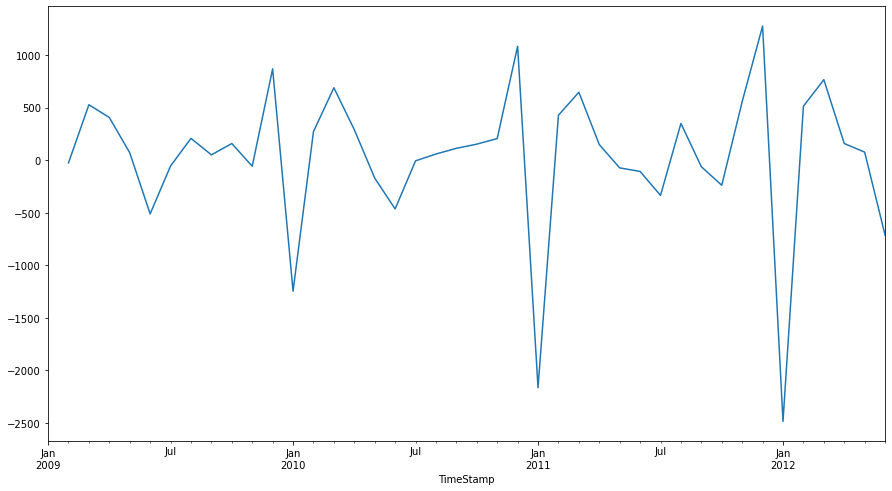

In [230]:
train_women['Sales(In ThousandDollars)'].diff(periods=1).plot()

## Feature Engineering for Exogenous Variables
### Exogenous variables must be stationary and no trend is to be visible

In [240]:
fi = pd.DataFrame()
fi['Features'] = xtrain.columns
fi['imp'] = rf.feature_importances_
fi.sort_values(by='imp',ascending=False)

,Features,imp
25,ProductCategory_WomenClothing,0.869969
1,Month,0.042155
24,ProductCategory_OtherClothing,0.010357
23,ProductCategory_MenClothing,0.009637
14,Earnings or wages in dollars per hour,0.008465
9,Monthly Real GDP Index (inMillion$),0.008061
8,Monthly Nominal GDP Index (inMillion$),0.007578
11,unemployment rate,0.006328
2,Event,0.005731
10,CPI,0.005710


In [254]:
xtrain.columns

Index(['Year', 'Month', 'Event', 'Temp avg (°C)', 'Dew Point avg (°C)',
       'Humidity (%) avg', 'Visibility (km) avg', 'WeatherEvent',
       'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports',
       'ProductCategory_MenClothing', 'ProductCategory_OtherClothing',
       'ProductCategory_WomenClothing'],
      dtype='object')

In [265]:
temp1 = xtrain.drop(['Temp avg (°C)','yieldperharvested acre','Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan','CommercialBankInterestRateonCreditCardPlans','Production (in  480-lb netweright in million bales)','Earnings or wages  in dollars per hour','Monthly Nominal GDP Index (inMillion$)','CPI','Monthly Real GDP Index (inMillion$)','ProductCategory_WomenClothing','ProductCategory_OtherClothing','ProductCategory_MenClothing'],axis=1)
vif = pd.DataFrame()
vif['Features'] = temp1.columns
vif['VIF'] = [variance_inflation_factor(temp1.values,i) for i in range(temp1.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
5,Visibility (km) avg,664.313357
12,Mill use (in 480-lb netweright in million ba...,573.011734
7,unemployment rate,538.124000
4,Humidity (%) avg,399.647985
11,Average upland harvested(million acres),368.577812
13,Exports,241.340867
10,Average upland planted(million acres),148.481750
6,WeatherEvent,40.373966
0,Year,37.801110
8,Cotton Monthly Price - US cents per Pound(lbs),30.780756


In [282]:
#Stationarity Check for Features
for i in sales913_men.drop(['Year','Month','ProductCategory'],axis=1).columns:
    adf = adfuller(sales913_men[i].diff(periods=1).dropna())
    print("Feature = {}    Pvalue = {}".format(i,adf[1]))
    print("="*50)

Feature = Sales(In ThousandDollars)    Pvalue = 0.0005979927596045815
Feature = Event    Pvalue = 1.6999974171873667e-10
Feature = Temp avg (°C)    Pvalue = 2.4257545824164816e-09
Feature = Dew Point avg (°C)    Pvalue = 6.7090468838454155e-06
Feature = Humidity (%) avg    Pvalue = 1.4364239502286417e-18
Feature = Visibility (km) avg    Pvalue = 8.454207783921518e-23
Feature = WeatherEvent    Pvalue = 2.7856645089053737e-08
Feature = Monthly Nominal GDP Index (inMillion$)    Pvalue = 3.920815590981427e-12
Feature = Monthly Real GDP Index (inMillion$)    Pvalue = 1.2616615417696137e-13
Feature = CPI    Pvalue = 0.0986936222519254
Feature = unemployment rate    Pvalue = 3.173165088430009e-07
Feature = CommercialBankInterestRateonCreditCardPlans    Pvalue = 1.6849160212223e-15
Feature = Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    Pvalue = 4.3295773944252155e-11
Feature = Earnings or wages  in dollars per hour    Pvalue = 2.0873892896025894e-11
Feature = Cotton Mon

# ARIMAX

In [286]:
d = range(1,2) #We saw that differencing=1 did made the series stationary
p = q =  range(0,6)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5)]

In [287]:
arima_men_aic = pd.DataFrame(columns=['param', 'AIC'])
arima_men_aic

,param,AIC


In [303]:
exog = train_men.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1)
for params in pdq:
    ar_model_men = ARIMA(endog=train_men['Sales(In ThousandDollars)'],order=params,exog=exog).fit()
    arima_men_aic=arima_men_aic.append({'param':params,'AIC':ar_model_men.aic},ignore_index=True)

In [304]:
arima_men_aic.sort_values(by='AIC')

,param,AIC
25,"(4, 1, 1)",527.271890
30,"(5, 1, 0)",527.770025
3,"(0, 1, 3)",528.678764
5,"(0, 1, 5)",530.042752
4,"(0, 1, 4)",530.105249
34,"(5, 1, 4)",530.657594
13,"(2, 1, 1)",530.670162
2,"(0, 1, 2)",531.385976
8,"(1, 1, 2)",531.715830
7,"(1, 1, 1)",531.886032


In [306]:
arima_model_men = ARIMA(endog=train_men['Sales(In ThousandDollars)'],order=(4,1,1),exog=exog).fit()
#print(arima_model_men.summary())

In [311]:
test_ex_men = test_men.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1)
test_forecast_men = arima_model_men.forecast(steps=len(test_men),exog=test_ex_men)

In [313]:
arima_rmse = mean_squared_error(test_men['Sales(In ThousandDollars)'],test_forecast_men,squared=False)
mape = mean_absolute_percentage_error(test_men['Sales(In ThousandDollars)'],test_forecast_men)
print("ARIMA TEST RMSE : ",arima_rmse)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  458.4020113459479
ARIMA TEST MAPE :  50.09781690336088


# SARIMAX

In [352]:
frequency = 12 #Yearly
P = Q = range(0,6)
D = range(0,2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P,D,Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (0, 0, 4, 12),
 (0, 0, 5, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (0, 1, 4, 12),
 (0, 1, 5, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 0, 4, 12),
 (1, 0, 5, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (1, 1, 4, 12),
 (1, 1, 5, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 0, 5, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (2, 1, 5, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 0, 4, 12),
 (3, 0, 5, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12),
 (3, 1, 4, 12),
 (3, 1, 5, 12),
 (4, 0, 0, 12),
 (4, 0, 1, 12),
 (4, 0, 2, 12),
 (4, 0, 3, 12),
 (4, 0, 4, 12),
 (4, 0, 5, 12),
 (4, 1, 0, 12),
 (4, 1, 1, 12),
 (4, 1, 2, 12),
 (4, 1, 3, 12),
 (4, 1, 4, 12),
 (4, 1, 5, 12),
 (5, 0, 0, 12),
 (5, 0, 1, 12),
 (5, 0, 

In [353]:
sarima_aic_men = pd.DataFrame({'params':[],'seasonal_params':[],'AIC':[]})
sarima_aic_men

,params,seasonal_params,AIC


In [354]:

for params in pdq:
    for seasonal_params in seasonal_pdq:
        sarimax_men = sm.tsa.statespace.SARIMAX(endog=train_men['Sales(In ThousandDollars)'],
                                                exog=exog,
                                                order=params,
                                                seasonal_order=seasonal_params).fit()
        
        
        sarima_aic_men=sarima_aic_men.append({'params':params,'seasonal_params':seasonal_params,'AIC':sarimax_men.aic},ignore_index=True)

KeyboardInterrupt: 

In [355]:
sarima_aic_men.sort_values(by='AIC')

,params,seasonal_params,AIC,param
90,NaN,"(1, 1, 0, 12)",286.643822,"(0, 1, 1)"
162,NaN,"(1, 1, 0, 12)",288.139329,"(0, 1, 2)"
30,NaN,"(2, 1, 0, 12)",288.148400,"(0, 1, 0)"
103,NaN,"(2, 1, 1, 12)",288.787641,"(0, 1, 1)"
91,NaN,"(1, 1, 1, 12)",288.827205,"(0, 1, 1)"
...,...,...,...,...
52,NaN,"(4, 0, 4, 12)",549.019128,"(0, 1, 0)"
41,NaN,"(3, 0, 5, 12)",549.531382,"(0, 1, 0)"
64,NaN,"(5, 0, 4, 12)",550.411079,"(0, 1, 0)"
53,NaN,"(4, 0, 5, 12)",551.417440,"(0, 1, 0)"


In [406]:
sarimax_men = sm.tsa.statespace.SARIMAX(endog=train_men['Sales(In ThousandDollars)'],
                                                exog=exog,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()

In [407]:
test_ex_men = test_men.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1)
test_forecast_men = sarimax_men.forecast(steps=len(test_men),exog=test_ex_men)
sarimax_rmse = mean_squared_error(test_men['Sales(In ThousandDollars)'],test_forecast_men,squared=False)
mape = mean_absolute_percentage_error(test_men['Sales(In ThousandDollars)'],test_forecast_men)
print("ARIMA TEST RMSE : ",sarimax_rmse)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  108.341982200051
ARIMA TEST MAPE :  13.108856181287742


In [370]:
sales913_men.drop(['Year','Month','ProductCategory'],axis=1,inplace=True)

In [388]:
sales913_other.drop(['Year','Month','ProductCategory'],axis=1,inplace=True)
sales913_Women.drop(['Year','Month','ProductCategory'],axis=1,inplace=True)

In [376]:
sales913_men.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Change(in%)','Average upland harvested(million acres)','Production (in  480-lb netweright in million bales)','Monthly Nominal GDP Index (inMillion$)'],axis=1,inplace=True)

In [378]:

sales913_other.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Change(in%)','Average upland harvested(million acres)','Production (in  480-lb netweright in million bales)','Monthly Nominal GDP Index (inMillion$)'],axis=1,inplace=True)
sales913_Women.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Change(in%)','Average upland harvested(million acres)','Production (in  480-lb netweright in million bales)','Monthly Nominal GDP Index (inMillion$)'],axis=1,inplace=True)


In [397]:
# sales913_men_pt = pd.DataFrame(power_transform(sales913_men.drop('Sales(In ThousandDollars)',axis=1)),columns=sales913_men.drop('Sales(In ThousandDollars)',axis=1).columns,index=sales913_men.index)
# sales913_other_pt = pd.DataFrame(power_transform(sales913_other.drop('Sales(In ThousandDollars)',axis=1)),columns=sales913_other.drop('Sales(In ThousandDollars)',axis=1).columns,index=sales913_other.index)
# sales913_women_pt = pd.DataFrame(power_transform(sales913_Women.drop('Sales(In ThousandDollars)',axis=1)),columns=sales913_Women.drop('Sales(In ThousandDollars)',axis=1).columns,index=sales913_Women.index)

In [ ]:
sarimax_men = sm.tsa.statespace.SARIMAX(endog=train_men['Sales(In ThousandDollars)'],
                                                exog=exog,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()
test_ex_men = test_men.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1)
test_forecast_men = sarimax_men.forecast(steps=len(test_men),exog=test_ex_men)
sarimax_rmse = mean_squared_error(test_men['Sales(In ThousandDollars)'],test_forecast_men,squared=False)
mape = mean_absolute_percentage_error(test_men['Sales(In ThousandDollars)'],test_forecast_men)
print("ARIMA TEST RMSE : ",sarimax_rmse)
print("ARIMA TEST MAPE : ",mape*100)

## Clean File

In [402]:
ytrain_men = sales913_men['Sales(In ThousandDollars)'].iloc[:int(len(sales913_men)*0.7)]
ytest_men  = sales913_men['Sales(In ThousandDollars)'].iloc[int(len(sales913_men)*0.7):]

xtrain_men = sales913_men_pt.iloc[:int(len(sales913_men)*0.7)]
xtest_men = sales913_men_pt.iloc[int(len(sales913_men)*0.7):]

In [478]:
#BEST FEATURES
tm =train_men[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']]
txm = test_men[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']]
tm.head(1)

,Event,Earnings or wages in dollars per hour,unemployment rate,WeatherEvent,Exports,yieldperharvested acre
TimeStamp,,,,,,
2009-01-31,2,22.05,7.8,10,11.55,799


In [477]:
sarimax_men = sm.tsa.statespace.SARIMAX(endog=ytrain_men,exog=tm,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()

test_forecast_men = sarimax_men.forecast(steps=len(xtest_men),exog=txm)
sarimax_rmse = mean_squared_error(ytest_men,test_forecast_men,squared=False)
mape = mean_absolute_percentage_error(ytest_men,test_forecast_men)
print("ARIMA TEST RMSE : ",sarimax_rmse)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  38.43998759758893
ARIMA TEST MAPE :  4.655606703642165


In [479]:
tm_pt =xtrain_men[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']]
txm_pt = xtest_men[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']]
tm_pt.head(1)

,Event,Earnings or wages in dollars per hour,unemployment rate,WeatherEvent,Exports,yieldperharvested acre
TimeStamp,,,,,,
2009-01-31,0.524246,-1.564839,-0.966588,-0.227431,0.165646,0.261348


In [481]:
sarimax_men = sm.tsa.statespace.SARIMAX(endog=ytrain_men,exog=tm,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()

test_forecast_men = sarimax_men.forecast(steps=len(xtest_men),exog=txm)
sarimax_rmse = mean_squared_error(ytest_men,test_forecast_men,squared=False)
mape = mean_absolute_percentage_error(ytest_men,test_forecast_men)
print("ARIMA TEST RMSE : ",sarimax_rmse)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  38.43998759758893
ARIMA TEST MAPE :  4.655606703642165


## Women and Other

In [482]:
ytrain_women = sales913_Women['Sales(In ThousandDollars)'].iloc[:int(len(sales913_men)*0.7)]
ytest_women  = sales913_Women['Sales(In ThousandDollars)'].iloc[int(len(sales913_men)*0.7):]

xtrain_women = sales913_Women[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']].iloc[:int(len(sales913_men)*0.7)]
xtest_women = sales913_Women[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']].iloc[int(len(sales913_men)*0.7):]


ytrain_other = sales913_other['Sales(In ThousandDollars)'].iloc[:int(len(sales913_men)*0.7)]
ytest_other  = sales913_other['Sales(In ThousandDollars)'].iloc[int(len(sales913_men)*0.7):]

xtrain_other = sales913_other[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']].iloc[:int(len(sales913_men)*0.7)]
xtest_other = sales913_other[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']].iloc[int(len(sales913_men)*0.7):]

In [490]:
sarimax_women = sm.tsa.statespace.SARIMAX(endog=ytrain_other,exog=xtrain_other,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()

test_forecast_women = sarimax_women.forecast(steps=len(ytest_other),exog=xtest_other)
sarimax_rmse_women = mean_squared_error(ytest_men,test_forecast_women,squared=False)
mape = mean_absolute_percentage_error(ytest_women,test_forecast_women)
print("ARIMA TEST RMSE : ",sarimax_rmse_women)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  604.8242547166851
ARIMA TEST MAPE :  62.13136016340547


In [526]:
sarimax_women = sm.tsa.statespace.SARIMAX(endog=ytrain_other,exog=xtrain_other,
                                                order=(0,1,4),
                                                seasonal_order=(1,1,0,3)).fit()

test_forecast_women = sarimax_women.forecast(steps=len(ytest_other),exog=xtest_other)
sarimax_rmse_women = mean_squared_error(ytest_men,test_forecast_women,squared=False)
mape = mean_absolute_percentage_error(ytest_women,test_forecast_women)
print("ARIMA TEST RMSE : ",sarimax_rmse_women)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  395.1629611080003
ARIMA TEST MAPE :  67.97283353444725


In [528]:
sales913_men.reset_index().drop('TimeStamp',axis=1,inplace=True)
TimeStamp = pd.date_range(start='2009-01-01',freq='MS',periods=len(sales913_men))
sales913_men['TimeStamp'] = TimeStamp
sales913_men.set_index(keys='TimeStamp',inplace=True)
sales913_men

,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Average upland planted(million acres),yieldperharvested acre,Mill use (in 480-lb netweright in million bales),Exports
TimeStamp,,,,,,,,,,,,,,,,,
2009-01-01,524.000000,2,-2.0,-10.0,54.0,16.0,10,14407.053343,233.402,7.8,12.03,11.44,22.05,9.296,799,4.170,11.550
2009-02-01,496.000000,2,3.0,-6.5,50.0,16.0,6,14366.176571,234.663,8.3,12.97,11.05,22.22,9.296,799,3.870,11.100
2009-03-01,542.000000,0,7.0,-1.0,56.0,16.0,10,14351.786822,235.067,8.7,12.97,11.05,22.22,9.296,799,3.720,11.650
2009-04-01,669.000000,1,11.5,2.5,54.5,16.0,12,14351.601731,235.582,9.0,12.97,11.05,22.13,9.296,787,3.620,12.225
2009-05-01,650.000000,2,17.0,11.0,69.0,15.0,14,14368.123959,235.975,9.4,13.32,11.25,22.04,9.297,803,3.520,12.300
2009-06-01,607.000000,1,20.0,16.0,80.0,12.0,20,14346.820106,237.172,9.5,13.32,11.25,21.96,8.668,796,3.470,10.300
2009-07-01,575.000000,2,23.0,18.0,72.0,15.0,13,14345.676097,237.600,9.5,13.32,11.25,22.00,8.905,796,3.470,9.700
2009-08-01,551.000000,0,24.0,19.0,71.0,16.0,13,14435.812509,238.282,9.6,13.71,10.89,22.16,8.905,809,3.470,9.700
2009-09-01,579.000000,1,19.0,13.0,68.0,16.0,7,14425.972752,238.568,9.8,13.71,10.89,22.20,8.989,827,3.470,10.000


In [543]:
ytrain_men = sales913_men['Sales(In ThousandDollars)'].iloc[:int(len(sales913_men)*0.7)]
ytest_men  = sales913_men['Sales(In ThousandDollars)'].iloc[int(len(sales913_men)*0.7):]

xtrain_men = sales913_men[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']].iloc[:int(len(sales913_men)*0.7)]
xtest_men = sales913_men[['Event','Earnings or wages  in dollars per hour','unemployment rate','WeatherEvent','Exports','yieldperharvested acre']].iloc[int(len(sales913_men)*0.7):]

In [536]:
sarimax_men = sm.tsa.statespace.SARIMAX(endog=ytrain_men,exog=xtrain_men,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()

test_forecast_men = sarimax_men.forecast(steps=len(ytest_men),exog=xtest_men)
sarimax_rmse = mean_squared_error(ytest_men,test_forecast_men,squared=False)
mape = mean_absolute_percentage_error(ytest_men,test_forecast_men)
print("ARIMA TEST RMSE : ",sarimax_rmse)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  431.4592431070173
ARIMA TEST MAPE :  58.8826871205551


In [544]:
sc = StandardScaler()
xtrain_men_sc = sc.fit_transform(xtrain_men)
xtest_men_sc = sc.transform(xtest_men)

In [545]:
sarimax_women = sm.tsa.statespace.SARIMAX(endog=ytrain_men,exog=xtrain_men_sc,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,12)).fit()

test_forecast_women = sarimax_women.forecast(steps=len(ytest_men),exog=xtest_men_sc)
sarimax_rmse_women = mean_squared_error(ytest_men,test_forecast_women,squared=False)
mape = mean_absolute_percentage_error(ytest_women,test_forecast_women)
print("ARIMA TEST RMSE : ",sarimax_rmse_women)
print("ARIMA TEST MAPE : ",mape*100)

ARIMA TEST RMSE :  38.140588548222865
ARIMA TEST MAPE :  79.18093501783106


In [552]:
sarimax_women = sm.tsa.statespace.SARIMAX(endog=ytrain_women,
                                                order=(0,1,1),
                                                seasonal_order=(1,1,0,3)).fit()

test_forecast_women = sarimax_women.forecast(steps=len(ytest_women))
sarimax_rmse_women = mean_squared_error(ytest_women,test_forecast_women,squared=False)
print("ARIMA TEST RMSE : ",sarimax_rmse_women)

ARIMA TEST RMSE :  575.8834629805555


In [553]:
sales913_Women.corr()

,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Average upland planted(million acres),yieldperharvested acre,Mill use (in 480-lb netweright in million bales),Exports
Sales(In ThousandDollars),1.000000,0.256532,-0.026049,-0.031505,0.069129,-0.144510,-0.019091,0.645569,0.616185,-0.439613,-0.406415,-0.498577,0.608589,0.358063,-0.069165,-0.201170,-0.008726
Event,0.256532,1.000000,-0.479539,-0.443477,-0.083674,0.030439,-0.108130,0.039812,-0.042535,-0.020792,-0.032672,0.015395,0.084473,0.063323,-0.103620,0.010703,-0.030836
Temp avg (°C),-0.026049,-0.479539,1.000000,0.983836,0.571851,-0.277097,0.011721,0.037697,0.106127,0.094060,0.010548,0.051447,-0.099983,0.033989,0.018780,-0.098360,-0.046491
Dew Point avg (°C),-0.031505,-0.443477,0.983836,1.000000,0.686126,-0.377217,0.104598,0.020585,0.108941,0.094117,-0.006907,0.056704,-0.103415,0.016545,0.055744,-0.083742,-0.070582
Humidity (%) avg,0.069129,-0.083674,0.571851,0.686126,1.000000,-0.700782,0.489761,-0.002366,0.104700,0.089728,-0.104868,0.081890,-0.060209,0.087353,0.011535,-0.045496,-0.155629
Visibility (km) avg,-0.144510,0.030439,-0.277097,-0.377217,-0.700782,1.000000,-0.637812,-0.069388,-0.176360,0.061481,0.199548,-0.137028,-0.068805,-0.152934,-0.035491,-0.106145,0.039547
WeatherEvent,-0.019091,-0.108130,0.011721,0.104598,0.489761,-0.637812,1.000000,-0.038596,0.011174,0.026283,-0.038978,0.099238,-0.019196,-0.027529,0.009783,-0.142772,-0.136090
Monthly Real GDP Index (inMillion$),0.645569,0.039812,0.037697,0.020585,-0.002366,-0.069388,-0.038596,1.000000,0.968225,-0.822011,-0.786904,-0.757333,0.968828,0.532740,0.024577,-0.213825,-0.138830
CPI,0.616185,-0.042535,0.106127,0.108941,0.104700,-0.176360,0.011174,0.968225,1.000000,-0.816553,-0.823011,-0.743458,0.960574,0.567000,0.038494,-0.212408,-0.202519
unemployment rate,-0.439613,-0.020792,0.094060,0.094117,0.089728,0.061481,0.026283,-0.822011,-0.816553,1.000000,0.914046,0.699350,-0.846395,-0.343796,-0.066903,-0.027472,0.289242


In [580]:
holt_winter_women = ExponentialSmoothing(ytrain_women,seasonal='multiplicative',trend='additive')
hw_model_women = holt_winter_women.fit(optimized=True,use_brute=True)
hw_predict_women = hw_model_women.forecast(steps=len(xtest_women))
hw_rmse_women = mean_squared_error(ytest_women, hw_predict_women, squared=False)
print("For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_women))

For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is 160.5569


In [559]:
result_hw= pd.DataFrame({'alpha':[],'beta':[],'gamma':[],'HoltWinterrmse':[]})
result_hw

,alpha,beta,gamma,HoltWinterrmse


In [577]:

for j in np.arange(0.5,0.990,0.01):
    for k in np.arange(0.50,0.990,0.01):
        hw_model = holt_winter_women.fit(smoothing_level=0.73, smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
        holt_predict = hw_model.forecast(steps=len(test_men))
        holt_rmse = mean_squared_error(linear_testY,holt_predict,squared=False)
        result_hw = result_hw.append({'alpha':i,'beta':j,'gamma':k,'HoltWinterrmse':holt_rmse},ignore_index=True)

In [579]:
result_hw.sort_values(by='HoltWinterrmse')

,alpha,beta,gamma,HoltWinterrmse
31933,1.00,0.50,0.50,1.369055e+03
22420,0.73,0.50,0.50,1.369055e+03
22421,0.73,0.50,0.51,1.373036e+03
31934,1.00,0.50,0.51,1.373036e+03
22320,0.72,0.50,0.50,1.375646e+03
...,...,...,...,...
30098,1.48,0.57,0.58,3.982748e+06
30488,1.52,0.56,0.58,6.301655e+06
30318,1.50,0.59,0.58,7.743703e+06
30455,1.52,0.53,0.55,1.037485e+07


In [6]:
sales913_women = pd.read_csv("sales913_Women.csv")
sales913_men = pd.read_csv("Sales913_men.csv")
sales913_other = pd.read_csv("sales913_other.csv")

sales14_men = pd.read_csv("sales14_men.csv")
sales14_women = pd.read_csv("sales14_Women.csv")
sales14_other = pd.read_csv("sales14_other.csv")

In [10]:
date = pd.date_range(start="2009-01-01",freq='M',periods=len(sales913_men))

sales913_women['Timestamp'] = date
sales913_women.set_index(keys='Timestamp',inplace=True)

sales913_other['Timestamp'] = date
sales913_other.set_index(keys='Timestamp',inplace=True)

sales913_men['Timestamp'] = date
sales913_men.set_index(keys='Timestamp',inplace=True)

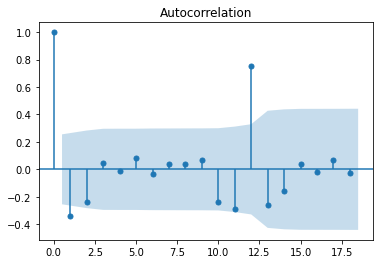

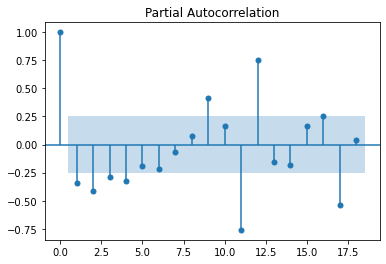

In [17]:
statsmodels.tsa.api.graphics.plot_acf(sales913_women['Sales(In ThousandDollars)'].diff().dropna());
statsmodels.tsa.api.graphics.plot_pacf(sales913_women['Sales(In ThousandDollars)'].diff().dropna());

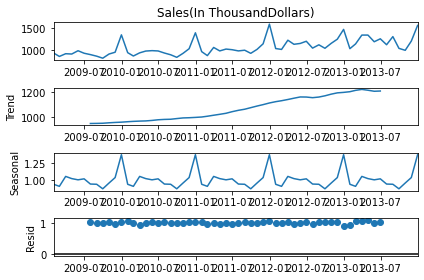

In [19]:
decompose_mul = seasonal_decompose(sales913_other['Sales(In ThousandDollars)'],model='multiplicative')
decompose_mul.plot();
#Frequency =12

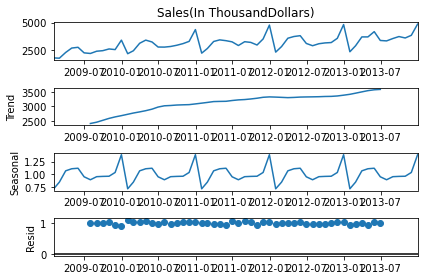

In [22]:
decompose_mul = seasonal_decompose(sales913_women['Sales(In ThousandDollars)'],model='multiplicative')
decompose_mul.plot();
#Frequency = 12

# MEN

In [99]:
ytrain_men = sales913_men['Sales(In ThousandDollars)'].iloc[:int(len(sales913_men)*0.7)]
ytest_men  = sales913_men['Sales(In ThousanadDollars)'].iloc[int(len(sales913_men)*0.7):]

xtrain_men = sales913_men[['Event','Earnings or wages  in dollars per hour','WeatherEvent','yieldperharvested acre']].iloc[:int(len(sales913_men)*0.7)]
xtest_men = sales913_men[['Event','Earnings or wages  in dollars per hour','WeatherEvent','yieldperharvested acre']].iloc[int(len(sales913_men)*0.7):]

In [105]:
s_men = statsmodels.tsa.api.statespace.SARIMAX(endog=ytrain_men,exog=xtrain_men,mle_regression=False,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(0,1,1)).fit()


In [107]:
test_forecast_men = s_men.forecast(steps=len(xtest_men),exog=xtest_men)
sarimax_rmse_men = mean_squared_error(ytest_men,test_forecast_men,squared=False)
print("ARIMA TEST RMSE : ",sarimax_rmse_men)

ARIMA TEST RMSE :  26.42017696875254


In [108]:
check = pd.DataFrame()
check['predict'] = test_forecast_men
check['test'] = ytest_men
check

,predict,test
2012-07-31,632.625854,613.000000
2012-08-31,637.269557,626.740044
2012-09-30,675.151781,687.000000
2012-10-31,745.305141,710.000000
2012-11-30,763.425790,731.000000
2012-12-31,1066.020316,1080.000000
2013-01-31,571.508827,599.000000
2013-02-28,578.476043,560.000000
2013-03-31,663.184084,682.000000
2013-04-30,751.339548,682.000000


# Women

In [ ]:
sales913_women['Mill use  (in  480-lb netweright in million bales)']

In [138]:
sales913_women.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-31,2009,1,WomenClothing,1755.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
2009-02-28,2009,2,WomenClothing,1729.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2009-03-31,2009,3,WomenClothing,2256.0,0,7.0,-1.0,56.0,16.0,10,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
2009-04-30,2009,4,WomenClothing,2662.0,1,11.5,2.5,54.5,16.0,12,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
2009-05-31,2009,5,WomenClothing,2732.0,2,17.0,11.0,69.0,15.0,14,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [280]:
ytrain_women = sales913_women['Sales(In ThousandDollars)'].iloc[:int(len(sales913_women)*0.7)]
ytest_women  = sales913_women['Sales(In ThousandDollars)'].iloc[int(len(sales913_women)*0.7):]

xtrain_women = sales913_women[['Monthly Nominal GDP Index (inMillion$)','Change(in%)','WeatherEvent']].iloc[:int(len(sales913_women)*0.7)]
xtest_women = sales913_women[['Monthly Nominal GDP Index (inMillion$)','Change(in%)','WeatherEvent']].iloc[int(len(sales913_women)*0.7):]

In [281]:
s_women = statsmodels.tsa.api.statespace.SARIMAX(endog=ytrain_women,exog=xtrain_women,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(2,1,4)).fit()

In [282]:
test_forecast_women = s_women.forecast(steps=len(ytest_women),exog=xtest_women)
sarimax_rmse_women = mean_squared_error(ytest_women,test_forecast_women,squared=False)
print("ARIMA TEST RMSE : ",sarimax_rmse_women)

ARIMA TEST RMSE :  161.1374480455299


In [283]:
check = pd.DataFrame()
check['predict'] = test_forecast_women
check['test'] = ytest_women
check

,predict,test
2012-07-31,2777.350738,2877.000000
2012-08-31,3330.477288,3059.000000
2012-09-30,3228.278709,3134.108409
2012-10-31,3033.367097,3168.000000
2012-11-30,3519.528568,3558.000000
2012-12-31,4679.201438,4824.000000
2013-01-31,2428.753972,2320.000000
2013-02-28,2970.416149,2872.000000
2013-03-31,3576.486446,3687.000000
2013-04-30,3768.851461,3687.000000


<AxesSubplot:xlabel='Timestamp'>

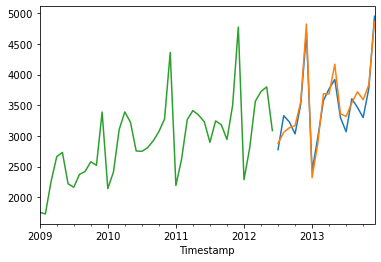

In [287]:
test_forecast_women.plot()
ytest_women.plot()
ytrain_women.plot()

# Other Clothing

In [289]:
sales913_other.corr()

,Year,Month,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Year,1.000000,-0.006799,0.569469,-0.034522,-0.010743,-0.016526,-0.035147,-0.116017,0.020900,0.975764,0.964672,0.973168,-0.843398,-0.796590,-0.748248,0.973872,0.149794,-0.203635,0.518303,0.239300,0.065061,0.228265,-0.223631,-0.138207
Month,-0.006799,1.000000,0.356099,0.302957,0.292793,0.303369,0.374922,-0.041770,-0.187814,0.185706,0.197450,0.170796,-0.028753,-0.113644,-0.222321,0.114601,-0.092352,-0.018785,0.037387,0.092266,-0.074211,0.064758,-0.096427,-0.151551
Sales(In ThousandDollars),0.569469,0.356099,1.000000,0.369034,-0.263916,-0.252573,-0.011853,-0.079822,0.091578,0.625997,0.619263,0.596002,-0.568016,-0.558792,-0.502212,0.621343,0.011998,-0.126011,0.347478,0.129890,-0.090543,0.090747,-0.206918,-0.153123
Event,-0.034522,0.302957,0.369034,1.000000,-0.479539,-0.443477,-0.083674,0.030439,-0.108130,0.026791,0.039812,-0.042535,-0.020792,-0.032672,0.015395,0.084473,0.035524,0.107236,0.063323,0.074257,-0.103620,0.044657,0.010703,-0.030836
Temp avg (°C),-0.010743,0.292793,-0.263916,-0.479539,1.000000,0.983836,0.571851,-0.277097,0.011721,0.035112,0.037697,0.106127,0.094060,0.010548,0.051447,-0.099983,-0.115752,-0.286984,0.033989,0.060117,0.018780,0.055381,-0.098360,-0.046491
Dew Point avg (°C),-0.016526,0.303369,-0.252573,-0.443477,0.983836,1.000000,0.686126,-0.377217,0.104598,0.025992,0.020585,0.108941,0.094117,-0.006907,0.056704,-0.103415,-0.122298,-0.316596,0.016545,0.040801,0.055744,0.045719,-0.083742,-0.070582
Humidity (%) avg,-0.035147,0.374922,-0.011853,-0.083674,0.571851,0.686126,1.000000,-0.700782,0.489761,0.017578,-0.002366,0.104700,0.089728,-0.104868,0.081890,-0.060209,-0.118871,-0.327950,0.087353,0.087289,0.011535,0.074815,-0.045496,-0.155629
Visibility (km) avg,-0.116017,-0.041770,-0.079822,0.030439,-0.277097,-0.377217,-0.700782,1.000000,-0.637812,-0.103462,-0.069388,-0.176360,0.061481,0.199548,-0.137028,-0.068805,-0.107676,0.319525,-0.152934,-0.109446,-0.035491,-0.103498,-0.106145,0.039547
WeatherEvent,0.020900,-0.187814,0.091578,-0.108130,0.011721,0.104598,0.489761,-0.637812,1.000000,-0.025737,-0.038596,0.011174,0.026283,-0.038978,0.099238,-0.019196,-0.090743,-0.109629,-0.027529,-0.132993,0.009783,-0.123407,-0.142772,-0.136090
Monthly Nominal GDP Index (inMillion$),0.975764,0.185706,0.625997,0.026791,0.035112,0.025992,0.017578,-0.103462,-0.025737,1.000000,0.994736,0.982114,-0.858605,-0.827311,-0.768088,0.977382,0.109701,-0.218706,0.525145,0.246731,0.036864,0.227647,-0.195371,-0.171684


In [404]:
ytrain_other = sales913_other['Sales(In ThousandDollars)'].iloc[:int(len(sales913_other)*0.7)]
ytest_other  = sales913_other['Sales(In ThousandDollars)'].iloc[int(len(sales913_other)*0.7):]

xtrain_other = sales913_other[['Temp avg (°C)','Visibility\xa0(km) avg','Change(in%)','Average upland planted(million acres)']].iloc[:int(len(sales913_other)*0.7)]
xtest_other = sales913_other[['Temp avg (°C)','Visibility\xa0(km) avg','Change(in%)','Average upland planted(million acres)']].iloc[int(len(sales913_other)*0.7):]

In [405]:
s_other = statsmodels.tsa.api.statespace.SARIMAX(endog=ytrain_other,exog=xtrain_other,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(0,1,0)).fit()
test_forecast_other = s_other.forecast(steps=len(ytest_other),exog=xtest_other)
sarimax_rmse_other = mean_squared_error(ytest_other,test_forecast_other,squared=False)
print("ARIMA TEST RMSE : ",sarimax_rmse_other)

ARIMA TEST RMSE :  87.96942597846822


In [ ]:
sales913_other['Mill use  (in  480-lb netweright in million bales)']

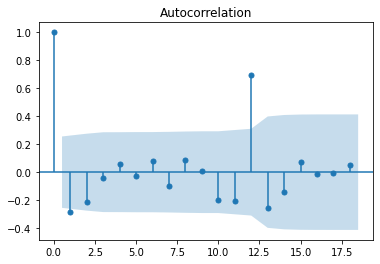

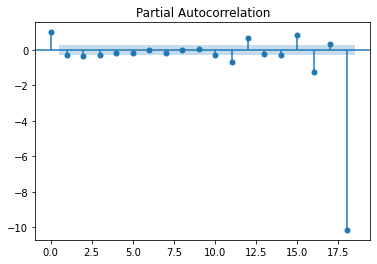

In [296]:
sm.tsa.graphics.plot_acf(sales913_other['Sales(In ThousandDollars)'].diff().dropna());
sm.tsa.graphics.plot_pacf(sales913_other['Sales(In ThousandDollars)'].diff().dropna());

In [434]:
d = range(1,2) #We saw that differencing=1 did made the series stationary
p = q =  range(0,3)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [441]:
frequency = range(1,6) #Yearly
P = Q = range(1,3)
D = range(1,2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P,D,Q))]
seasonal_pdq

[(1, 1, 1, 12), (1, 1, 2, 12), (2, 1, 1, 12), (2, 1, 2, 12)]

In [442]:
sarima_aic_other = pd.DataFrame({'params':[],'seasonal_params':[],'AIC':[]})
sarima_aic_other

,params,seasonal_params,AIC


In [463]:

s_other = statsmodels.tsa.api.statespace.SARIMAX(endog=ytrain_other,exog=xtrain_other,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1, 1, 0, 12),
                                       time_varying_regression=True,
                                      order=(0,1,0)).fit()
test_forecast_other = s_other.forecast(steps=len(ytest_other),exog=xtest_other)
sarimax_rmse_other = mean_squared_error(ytest_other,test_forecast_other,squared=False)
print("ARIMA TEST RMSE : ",sarimax_rmse_other)


ARIMA TEST RMSE :  87.96942597846822
